**Imports**

In [9]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack

**Loading the data**

In [10]:
data = pd.read_csv("data/properties.csv")

data.head()

data.columns


Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')

Defining features and target

In [17]:
y = data["price"]

num_values = data[["price","total_area_sqm", "latitude", "longitude",'surface_land_sqm', "garden_sqm", "primary_energy_consumption_sqm", "construction_year", "cadastral_income", 'nbr_frontages', 'nbr_bedrooms', "terrace_sqm" ]]

cat_values = data[["property_type", "subproperty_type", "region", "province", "locality", "zip_code", "state_building", "epc", "heating_type", 'equipped_kitchen']]

bin_values = data[["fl_garden", "fl_furnished", "fl_open_fire", "fl_terrace","fl_swimming_pool", "fl_floodzone", "fl_double_glazing"]]

print(type(num_values))

<class 'pandas.core.frame.DataFrame'>


Numeric values - preprocessing

In [16]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(num_values)
imp_num_values = imputer.transform(num_values)

print(type(imp_num_values))

imp_num_val = pd.DataFrame(imp_num_values, columns = ["price","total_area_sqm", "latitude", "longitude",'surface_land_sqm', "garden_sqm", "primary_energy_consumption_sqm", "construction_year", "cadastral_income", 'nbr_frontages', 'nbr_bedrooms', "terrace_sqm"])

print(type(imp_num_val))

print(imp_num_val.head())

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
      price  total_area_sqm   latitude  longitude  surface_land_sqm  \
0  225000.0      100.000000  51.217172   4.379982       1157.087505   
1  449000.0      163.670746  51.174944   3.845248        680.000000   
2  335000.0      142.000000  50.842043   4.334543       1157.087505   
3  501000.0      187.000000  51.238312   4.817192        505.000000   
4  982700.0      169.000000  50.886625   4.328660       1157.087505   

   garden_sqm  primary_energy_consumption_sqm  construction_year  \
0         0.0                      231.000000        1963.000000   
1         0.0                      221.000000        1984.406054   
2         0.0                     1688.748002        1984.406054   
3         0.0                       99.000000        2024.000000   
4       142.0                       19.000000        2022.000000   

   cadastral_income  nbr_frontages  nbr_bedrooms  terrace_sqm  
0        922.000000       2.000000    

Numeric values - correlations

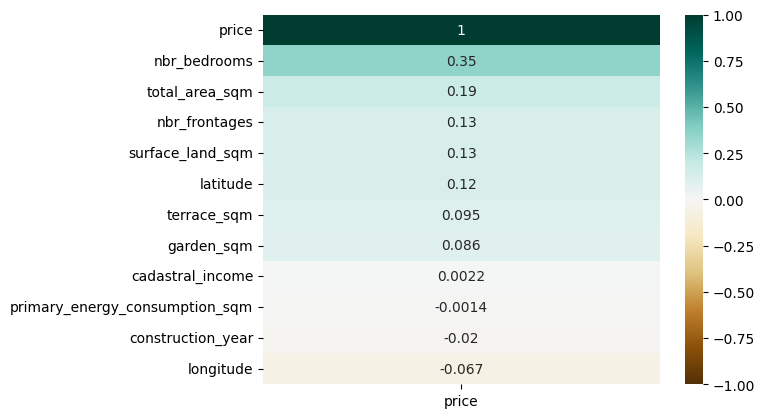

In [13]:
heatmap = sns.heatmap((imp_num_val).corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


Categorical values - preprocessing

In [23]:
cat_values["equipped_kitchen"].value_counts().to_frame() #--> lot of missing values
cat_values["property_type"].value_counts().to_frame() # --> OK (house and apartment), BINARY?
cat_values["subproperty_type"].value_counts().to_frame() # -->OK but many subtypes, how many to include?
cat_values["region"].value_counts().to_frame()  # --> OK



,count
region,
Flanders,43424
Wallonia,24126
Brussels-Capital,7958
MISSING,3


Categorical values - Correlations

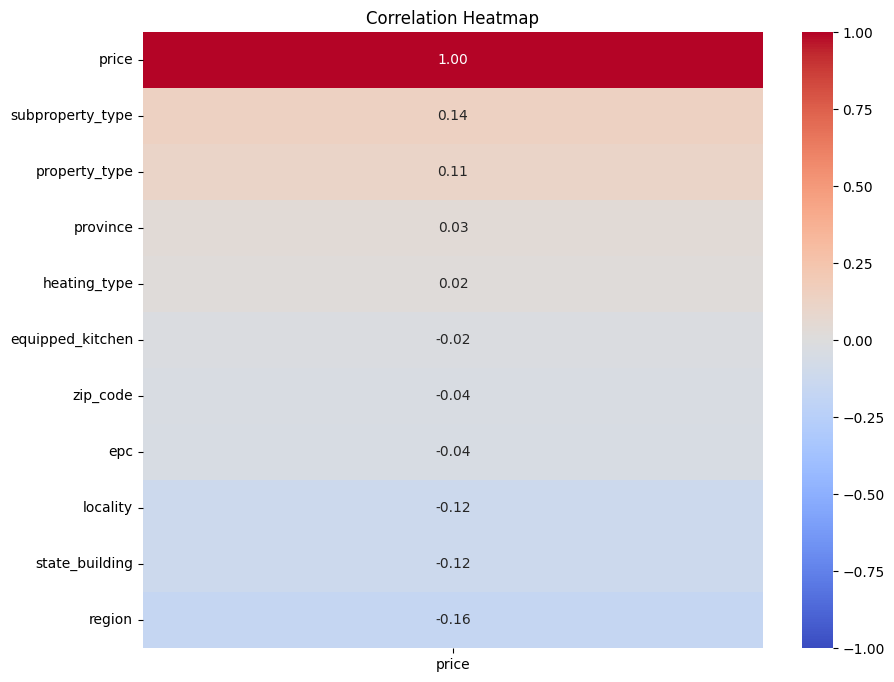

In [14]:
encoded_df = pd.DataFrame()

label_encoders = {}

for column in cat_values.columns:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(cat_values[column])
    label_encoders[column] = le

encoded_df['price'] = data['price']

plt.figure(figsize=(10, 8))
sns.heatmap(encoded_df.corr()[["price"]].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
